In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,recall_score,f1_score,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
import warnings

In [54]:
warnings.filterwarnings("ignore")

In [28]:
data = pd.read_csv(r"Crop_recommendation.csv")
data.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


<AxesSubplot:>

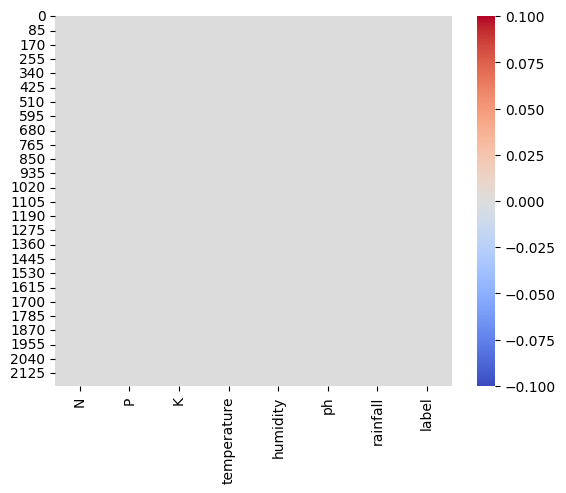

In [116]:
sns.heatmap(data.isnull(),cmap="coolwarm")

In [33]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
data["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

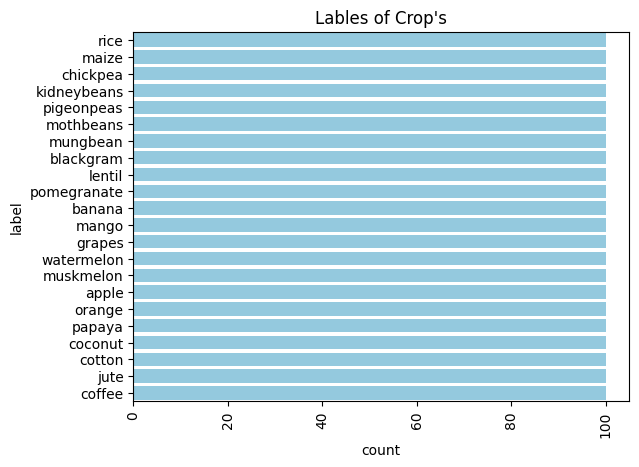

In [66]:
sns.countplot(y=data["label"],data=data,color="skyblue")
plt.xticks(rotation=90)
plt.title("Lables of Crop's")
plt.show()

<AxesSubplot:xlabel='ph', ylabel='Density'>

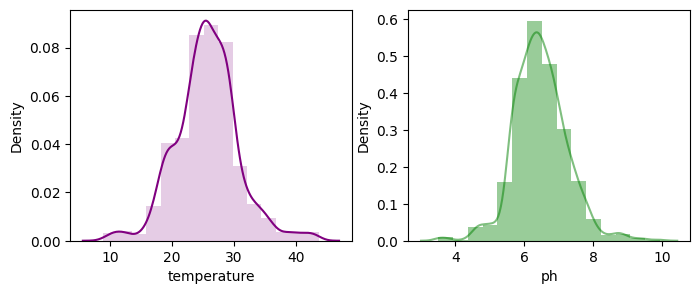

In [63]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.distplot(data["temperature"],hist_kws={"alpha":0.2},color="purple",bins=15)
plt.subplot(1,2,2)
sns.distplot(data["ph"],color="green",kde_kws={'alpha':0.5},bins=15)

<AxesSubplot:xlabel='temperature', ylabel='Count'>

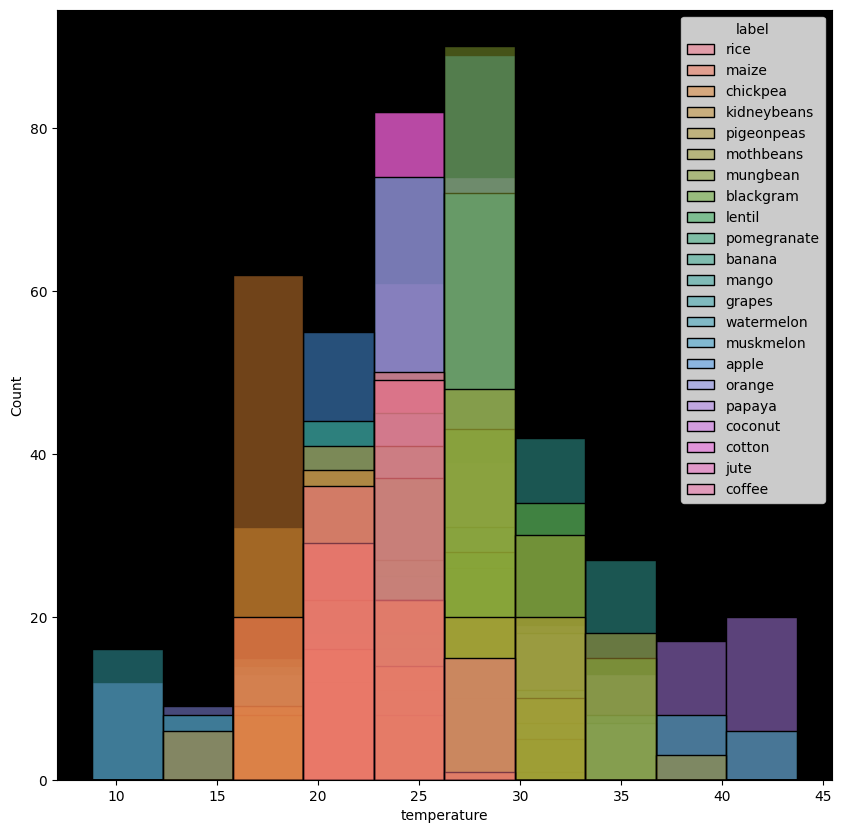

In [8]:
plt.figure(figsize=(10,10),facecolor="white")
ax = plt.axes()
ax.set_facecolor("black")
sns.histplot(x=data["temperature"],data=data,hue="label",bins=10)

In [67]:
x = data.drop("label",axis=1)
y = data["label"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [110]:
pipeline = Pipeline([
    ("scale",StandardScaler()),
    ("kn",KNeighborsClassifier(n_neighbors=1))
])
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('kn', KNeighborsClassifier(n_neighbors=1))])

In [111]:
print(f"Score :{pipeline.score(x_test,y_test):.2f}%")
print(f"Classification Report :\n{classification_report(y_test,pipeline.predict(x_test))}")

Score :0.97%
Classification Report :
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         9
      banana       1.00      1.00      1.00        12
   blackgram       1.00      0.85      0.92        13
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00         9
      cotton       0.86      1.00      0.92         6
      grapes       1.00      1.00      1.00         8
        jute       0.79      1.00      0.88        11
 kidneybeans       1.00      1.00      1.00        13
      lentil       0.70      1.00      0.82         7
       maize       1.00      0.92      0.96        12
       mango       1.00      1.00      1.00         4
   mothbeans       1.00      0.91      0.95        11
    mungbean       1.00      1.00      1.00        10
   muskmelon       1.00      1.00      1.00         7
      orange       1.00      1.00      1.00 

<AxesSubplot:>

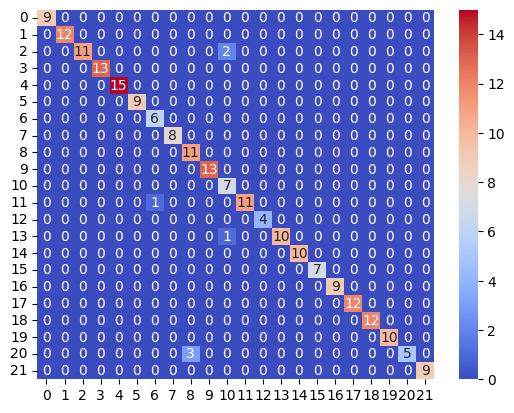

In [112]:
sns.heatmap(confusion_matrix(y_test,pipeline.predict(x_test)),annot=True,cmap="coolwarm")

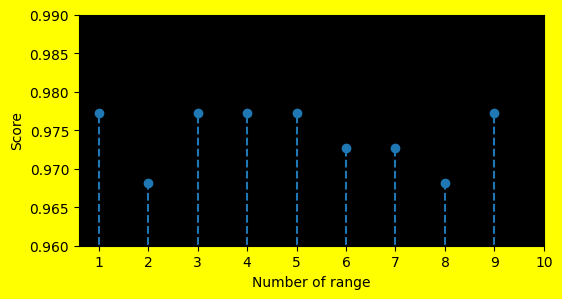

In [126]:
k_range = range(1,10)
score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    score.append(knn.score(x_test,y_test))
    error.append(np.mean(pipeline.predict(x_test)!=y_test))
plt.figure(figsize=(6,3),facecolor="yellow")
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(k_range,score)
plt.vlines(k_range,0,score,linestyles="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)])
plt.xlabel("Number of range")
plt.ylabel("Score")
plt.show()